In [1]:
import pandas as pd
import pymongo
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용
import scipy
import scipy.stats as stats

client=pymongo.MongoClient("192.168.10.240",27017)
db= client['AI_LKJ']
collection_9suk = db['kto9suk9suk_review']
collection_yeomi = db['yeomi_review']

data_consume_9suk = collection_9suk.find()
data_consume_yeomi = collection_yeomi.find()

df_consume_9suk = pd.DataFrame(data_consume_9suk)
df_consume_yeomi = pd.DataFrame(data_consume_yeomi)

### 데이터 확인 및 전처리

In [2]:
df_consume_9suk

,_id,card_content,card_date,card_like,card_watch,check_point,review_content,review_date
0,65f99f8608bfcc46ca19351d,알려지지 않았다고 해서 가치가 없는 것은 아니다. 한 장의 사진으로 사랑 받게 된 ...,2014년 6월 23일,50,,pkcKuIzTJ0,NaN,NaN
1,65f99f8608bfcc46ca19351e,알려지지 않았다고 해서 가치가 없는 것은 아니다. 한 장의 사진으로 사랑 받게 된 ...,2014년 6월 23일,50,,pkcKuIzTJ0,정말 아름다워요,2014년 7월 9일
2,65f99f8608bfcc46ca19351f,알려지지 않았다고 해서 가치가 없는 것은 아니다. 한 장의 사진으로 사랑 받게 된 ...,2014년 6월 23일,50,,pkcKuIzTJ0,멋진 섬이네요,2014년 6월 24일
3,65f99f8808bfcc46ca193520,"멋진 풍경과 감동, 여행과 휴식은 생각보다 가까운 곳에 있다. 부산 만덕 레고마을\...",2014년 6월 23일,87,,pk8YhwTTDR,NaN,NaN
4,65f99f8b08bfcc46ca193521,"유유자적 한가로이 풀을 뜯는 말 뒤편,\n걸려있는 구름마저도 평화로운 성산일출봉\n...",2014년 7월 10일,42,,qQx_BQTTBH,NaN,NaN
...,...,...,...,...,...,...,...,...
125933,662a1fb44a4fe5fadf3f71ee,신규 개장 기념 무료 운영 중(~5/6)‼ 짜릿함 최고인😆 김천 #사계절썰매장\n\...,2024년 4월 25일,106,,C6LYPKTSzun,🛷,2024년 4월 25일
125934,662f1d43b33c9dc30aa95f3f,"제주도 토종 소, 흑한우 살짝 레어로 익혀 한 입에 쏘옥~!\n참 숯불로 구워 더욱...",2014년 8월 5일,81,,rT9rIsTTNs,NaN,NaN
125935,662f1d4bb33c9dc30aa95f40,범선의 휘황찬란한 실루엣이 영덕 대게를 먹으러 찾는 방문객을 반기는 이곳 +_+ 대...,2014년 8월 26일,100,,sJhwZxzTCf,NaN,NaN
125936,662f22cb5cb025207273f6f6,"제주도 토종 소, 흑한우 살짝 레어로 익혀 한 입에 쏘옥~!\n참 숯불로 구워 더욱...",2014년 8월 5일,81,,rT9rIsTTNs,NaN,NaN


In [3]:
df_consume_yeomi

,_id,card_content,card_date,card_like,card_watch,check_point,review_content,review_date
0,65f9bf1f08bfcc46ca19353d,".\n#엘칼라파테, #ElCalafate #아르헨티나, #Argentina\n.\n...",2018년 1월 21일,6492,,BeMmKk5h8aX,NaN,NaN
1,65f9bf1f08bfcc46ca19353e,".\n#엘칼라파테, #ElCalafate #아르헨티나, #Argentina\n.\n...",2018년 1월 21일,6492,,BeMmKk5h8aX,혹시 이 전거는 복구 안되나요..?,2018년 8월 10일
2,65f9bf1f08bfcc46ca19353f,".\n#엘칼라파테, #ElCalafate #아르헨티나, #Argentina\n.\n...",2018년 1월 21일,6492,,BeMmKk5h8aX,@jjuning__ 살면서 처음 밟아보는 빙하 위에서의 위스키 한잔이란~~~~~~~😆🍻👍,2018년 1월 23일
3,65f9bf1f08bfcc46ca193540,".\n#엘칼라파테, #ElCalafate #아르헨티나, #Argentina\n.\n...",2018년 1월 21일,6492,,BeMmKk5h8aX,@dong_man_kim 오 동만쓰~,2018년 1월 22일
4,65f9bf1f08bfcc46ca193541,".\n#엘칼라파테, #ElCalafate #아르헨티나, #Argentina\n.\n...",2018년 1월 21일,6492,,BeMmKk5h8aX,@ihpa_999999999 갈래갈래,2018년 1월 22일
...,...,...,...,...,...,...,...,...
1152553,662f1f95777cf716ba28134f,".\n#시즈오카, #Shizuoka, #일본, #Japan\n.\n.\n누가 호텔 ...",2018년 2월 4일,1만,,BewaM05BHcA,NaN,NaN
1152554,662f1f9b777cf716ba281350,".\n#양곤, #Yangon, #미얀마, #Myanmar\n.\n.\n2년 전 사진...",2018년 2월 14일,7176,,BfLaqG4hS_k,NaN,NaN
1152555,662f1fa1777cf716ba281351,".\n#프라하, #Prague, #체코, #Czech\n.\n프라하성까지 걸어올라가...",2018년 2월 28일,9860,,BfuYMBHB8XE,NaN,NaN
1152556,662f2a098eaf5853dcbbf1fb,".\n#시즈오카, #Shizuoka, #일본, #Japan\n.\n.\n누가 호텔 ...",2018년 2월 4일,1만,,BewaM05BHcA,NaN,NaN


In [4]:
list_region = ['#강원','#경기','#경남','#경북','#광주','#대구','#대전','#부산','#서울','#세종','#울산','#인천','#전남','#전북','#제주','#충남','#충북','#강릉','#고성','#동해','#삼척','#속초','#양구','#양양','#영월','#원주','#인제','#정선','#철원','#춘천','#태백','#평창','#홍천','#화천','#횡성','#가평','#고양','#과천','#광명','#광주','#구리','#군포','#김포','#남양주','#동두천','#부천','#성남','#수원','#시흥','#안산','#안성','#안양','#양주','#양평','#여주','#연천','#오산','#용인','#의왕','#의정부','#이천','#파주','#평택','#포천','#하남','#화성','#거제','#거창','#고성','#김해','#남해','#밀양','#사천','#산청','#양산','#의령','#진주','#창녕','#창원','#통영','#하동','#함안','#함양','#합천','#경산','#경주','#고령','#구미','#김천','#문경','#봉화','#상주','#성주','#안동','#영덕','#영양','#영주','#영천','#예천','#울릉','#울진','#의성','#청도','#청송','#칠곡','#포항','#광산','#남구','#동구','#북구','#서구','#군위','#남구','#달서','#달성','#동구','#북구','#서구','#수성','#중구','#대덕','#동구','#서구','#유성','#중구','#강서','#금정','#기장','#남구','#동구','#동래','#부산진','#북구','#사상','#사하','#서구','#수영','#연제','#영도','#중구','#해운대','#강남','#강동','#강북','#강서','#관악','#광진','#구로','#금천','#노원','#도봉','#동대문','#동작','#마포','#서대문','#서초','#성동','#성북','#송파','#양천','#영등포','#용산','#은평','#종로','#중구','#중랑','#남구','#동구','#북구','#울주','#중구','#강화','#계양','#남동','#동구','#미추홀','#부평','#서구','#연수','#옹진','#중구','#강진','#고흥','#곡성','#광양','#구례','#나주시','#담양','#목포','#무안','#보성','#순천','#신안','#여수','#영광','#영암','#완도','#장성','#장흥','#진도','#함평','#해남','#화순','#고창','#군산','#김제','#남원','#무주','#부안','#순창','#완주','#익산','#임실','#장수','#전주','#정읍','#진안','#서귀포','#제주','#계룡','#공주','#금산','#논산','#당진','#보령','#부여','#서산','#서천','#아산','#예산','#천안','#청양','#태안','#홍성','#괴산','#단양','#보은','#영동','#옥천','#음성','#제천','#증평','#진천','#청주','#충주']
korea_trip = []
for i in df_consume_yeomi[df_consume_yeomi['review_content'].isna()]['card_content']:
    for j in list_region:
        if j in i:
            korea_trip.append(i)
            break
condition_region = f"card_content in {korea_trip}"
korea_yeomi_review = df_consume_yeomi.query(condition_region)

df_sns = pd.concat([df_consume_9suk, korea_yeomi_review], ignore_index=True)
df_sns

,_id,card_content,card_date,card_like,card_watch,check_point,review_content,review_date
0,65f99f8608bfcc46ca19351d,알려지지 않았다고 해서 가치가 없는 것은 아니다. 한 장의 사진으로 사랑 받게 된 ...,2014년 6월 23일,50,,pkcKuIzTJ0,NaN,NaN
1,65f99f8608bfcc46ca19351e,알려지지 않았다고 해서 가치가 없는 것은 아니다. 한 장의 사진으로 사랑 받게 된 ...,2014년 6월 23일,50,,pkcKuIzTJ0,정말 아름다워요,2014년 7월 9일
2,65f99f8608bfcc46ca19351f,알려지지 않았다고 해서 가치가 없는 것은 아니다. 한 장의 사진으로 사랑 받게 된 ...,2014년 6월 23일,50,,pkcKuIzTJ0,멋진 섬이네요,2014년 6월 24일
3,65f99f8808bfcc46ca193520,"멋진 풍경과 감동, 여행과 휴식은 생각보다 가까운 곳에 있다. 부산 만덕 레고마을\...",2014년 6월 23일,87,,pk8YhwTTDR,NaN,NaN
4,65f99f8b08bfcc46ca193521,"유유자적 한가로이 풀을 뜯는 말 뒤편,\n걸려있는 구름마저도 평화로운 성산일출봉\n...",2014년 7월 10일,42,,qQx_BQTTBH,NaN,NaN
...,...,...,...,...,...,...,...,...
599153,662b80e0f231019cd5b61943,"일단 저장!📩 서울에서 데이트, 야장, 피크닉까지 쌈@뽕하게 즐기는 방법😜\n\n서...",2024년 4월 26일,123,,C6OA2Fbhy5r,NaN,NaN
599154,662b80e0f231019cd5b61944,"일단 저장!📩 서울에서 데이트, 야장, 피크닉까지 쌈@뽕하게 즐기는 방법😜\n\n서...",2024년 4월 26일,123,,C6OA2Fbhy5r,미츠바 좋습니당,2024년 4월 26일
599155,662b80e0f231019cd5b61945,"일단 저장!📩 서울에서 데이트, 야장, 피크닉까지 쌈@뽕하게 즐기는 방법😜\n\n서...",2024년 4월 26일,123,,C6OA2Fbhy5r,와 이제 곧 장미공원의 시즌이다,2024년 4월 26일
599156,662b80e1f231019cd5b61946,"일단 저장!📩 서울에서 데이트, 야장, 피크닉까지 쌈@뽕하게 즐기는 방법😜\n\n서...",2024년 4월 26일,123,,C6OA2Fbhy5r,혹시 여기 다 가본 사람 있어? 어디가 젤 좋았는지 추천해주라줘~🙋🏻‍♀️,2024년 4월 26일


In [5]:
df_title = df_sns[df_sns.isnull().any(axis=1)]
df_title

,_id,card_content,card_date,card_like,card_watch,check_point,review_content,review_date
0,65f99f8608bfcc46ca19351d,알려지지 않았다고 해서 가치가 없는 것은 아니다. 한 장의 사진으로 사랑 받게 된 ...,2014년 6월 23일,50,,pkcKuIzTJ0,NaN,NaN
3,65f99f8808bfcc46ca193520,"멋진 풍경과 감동, 여행과 휴식은 생각보다 가까운 곳에 있다. 부산 만덕 레고마을\...",2014년 6월 23일,87,,pk8YhwTTDR,NaN,NaN
4,65f99f8b08bfcc46ca193521,"유유자적 한가로이 풀을 뜯는 말 뒤편,\n걸려있는 구름마저도 평화로운 성산일출봉\n...",2014년 7월 10일,42,,qQx_BQTTBH,NaN,NaN
7,65f99f8d08bfcc46ca193524,울산 명선도의 불게 타오르는 노을과 해무의 장관\n마치 그림을 그려놓은듯한 풍경에 ...,2014년 7월 11일,58,,qTGZrrzTAH,NaN,NaN
11,65f99f8f08bfcc46ca193528,비가 내린 후에야 진정한 모습을 드러내는 시무지기폭포\n이 비경을 만나러 가는 고된...,2014년 7월 12일,39,,qVtXCrTTIY,NaN,NaN
...,...,...,...,...,...,...,...,...
599013,662abcaaf231019cd5b60515,"드디어 다음주, 국가권력급 벚꽃맛집 ‘여의도’ 봄꽃축제 개막 (뿌뿌-)\n\n누가 ...",2024년 3월 23일,3091,,C41qMeoBkpF,NaN,NaN
599038,662abe16f231019cd5b60b80,지금 제일 핫하다는 기안84 전시 ‘기안도(奇案島)’ 후기 🔥\n다들 여기서 기안8...,2024년 3월 26일,4752,,C49-AnfBEhj,NaN,NaN
599137,662ada15f231019cd5b61622,"지친 일상으로부터 벗어날 수 있는 시간, 응봉산에서 🌙\n\n이번 한주도 수고한 여...",2024년 4월 19일,1530,,C58BRwIhdW4,NaN,NaN
599140,662af284f231019cd5b61861,거창 여행 어떻게 할지 모르겠다고? 😎 여미가 직접 다녀와서 알려주는 [밥상의 여정...,2024년 4월 24일,1288,,C6I3IZBhfzp,NaN,NaN


In [6]:
from konlpy.tag import Okt
okt = Okt()

def remove_stopwords(text, stopwords):
    result = [word for word in text if word not in stopwords]
    return result

# 조사, 어미 구두점 같은 것을 제거 함수 / 나중에 불용어 처리 함수도 작성해주는 것이 좋음
def okt_clean(text):
    clean_text = []
    for word in okt.pos(text, stem=True):
        if word[1] not in ['Josa', 'Eomi', 'Punctuation','Determiner','Conjunction','Verb','Adjective','Adverb']:
            clean_text.append(word[0])
    # 불용어 처리
    stopwords = ['가', '고', '을', '를', '이', '는']  # 불용어 리스트
    clean_text = remove_stopwords(clean_text, stopwords)
    return " ".join(clean_text)

In [7]:
df_title["card_content"] = df_title["card_content"].apply(okt_clean)
df_title['card_date'] = pd.to_datetime(df_title['card_date'], format='%Y년 %m월 %d일')
df_title

/tmp/ipykernel_2248/1765550296.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_title["card_content"] = df_title["card_content"].apply(okt_clean)
/tmp/ipykernel_2248/1765550296.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_title['card_date'] = pd.to_datetime(df_title['card_date'], format='%Y년 %m월 %d일')


,_id,card_content,card_date,card_like,card_watch,check_point,review_content,review_date
0,65f99f8608bfcc46ca19351d,가치 것 장의 사진 사랑 삼척 솔섬 \n #korea #travel #솔섬 #nat...,2014-06-23,50,,pkcKuIzTJ0,NaN,NaN
3,65f99f8808bfcc46ca193520,풍경 감동 여행 휴식 생각 곳 부산 만덕 레고 마을 \n #korea #한국 #tr...,2014-06-23,87,,pk8YhwTTDR,NaN,NaN
4,65f99f8b08bfcc46ca193521,유유 자 적 풀 말 뒤편 \n 구름 성산일출봉 \n\n #제주도 #제주여행 #일출봉...,2014-07-10,42,,qQx_BQTTBH,NaN,NaN
7,65f99f8d08bfcc46ca193524,울산 명 선도 불 노을 해무 장관 \n 마치 그림 듯 풍경 넋 \n\n #울산 #명...,2014-07-11,58,,qTGZrrzTAH,NaN,NaN
11,65f99f8f08bfcc46ca193528,비 후 모습 시 무지기 폭포 \n 비경 걸음 것 \n\n #광주 #무등산 #시무지기...,2014-07-12,39,,qVtXCrTTIY,NaN,NaN
...,...,...,...,...,...,...,...,...
599013,662abcaaf231019cd5b60515,다음주 국가 권력 급 벚꽃 맛집 ‘ 여의도 봄꽃 축제 개막 뿌뿌 \n\n 누가 \n...,2024-03-23,3091,,C41qMeoBkpF,NaN,NaN
599038,662abe16f231019cd5b60b80,지금 제일 핫 기안 84 전시 ‘ 기안 奇案島 후기 🔥 \n 여기 기안 84 전하 ...,2024-03-26,4752,,C49-AnfBEhj,NaN,NaN
599137,662ada15f231019cd5b61622,일상 수 시간 응봉산 🌙 \n\n 이번 한주 수고 여러분 들 위 선물 🎁 \n 하루...,2024-04-19,1530,,C58BRwIhdW4,NaN,NaN
599140,662af284f231019cd5b61861,거창 여행 😎 여 미가 직접 밥상 여정 거창 여행 스팟 총 정리 #광고 \n\n 1...,2024-04-24,1288,,C6I3IZBhfzp,NaN,NaN


In [8]:
df_title["card_date"].dt.year.value_counts()

card_date
2022    756
2021    742
2023    706
2019    609
2018    568
2020    439
2015    371
2016    342
2017    295
2014    185
2024    179
Name: count, dtype: int64

In [9]:
df_title['card_year'] = pd.to_datetime(df_title['card_date']).dt.year
df_title['card_month'] = pd.to_datetime(df_title['card_date']).dt.month
# 계절 컬럼 추가
def get_season(month):
    if month in [3, 4, 5]:
        return '봄'
    elif month in [6, 7, 8]:
        return '여름'
    elif month in [9, 10, 11]:
        return '가을'
    else:
        return '겨울'

df_title["season"] = df_title['card_month'].apply(get_season)
df_title

/tmp/ipykernel_2248/4164792611.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_title['card_year'] = pd.to_datetime(df_title['card_date']).dt.year
/tmp/ipykernel_2248/4164792611.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_title['card_month'] = pd.to_datetime(df_title['card_date']).dt.month
/tmp/ipykernel_2248/4164792611.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

,_id,card_content,card_date,card_like,card_watch,check_point,review_content,review_date,card_year,card_month,season
0,65f99f8608bfcc46ca19351d,가치 것 장의 사진 사랑 삼척 솔섬 \n #korea #travel #솔섬 #nat...,2014-06-23,50,,pkcKuIzTJ0,NaN,NaN,2014,6,여름
3,65f99f8808bfcc46ca193520,풍경 감동 여행 휴식 생각 곳 부산 만덕 레고 마을 \n #korea #한국 #tr...,2014-06-23,87,,pk8YhwTTDR,NaN,NaN,2014,6,여름
4,65f99f8b08bfcc46ca193521,유유 자 적 풀 말 뒤편 \n 구름 성산일출봉 \n\n #제주도 #제주여행 #일출봉...,2014-07-10,42,,qQx_BQTTBH,NaN,NaN,2014,7,여름
7,65f99f8d08bfcc46ca193524,울산 명 선도 불 노을 해무 장관 \n 마치 그림 듯 풍경 넋 \n\n #울산 #명...,2014-07-11,58,,qTGZrrzTAH,NaN,NaN,2014,7,여름
11,65f99f8f08bfcc46ca193528,비 후 모습 시 무지기 폭포 \n 비경 걸음 것 \n\n #광주 #무등산 #시무지기...,2014-07-12,39,,qVtXCrTTIY,NaN,NaN,2014,7,여름
...,...,...,...,...,...,...,...,...,...,...,...
599013,662abcaaf231019cd5b60515,다음주 국가 권력 급 벚꽃 맛집 ‘ 여의도 봄꽃 축제 개막 뿌뿌 \n\n 누가 \n...,2024-03-23,3091,,C41qMeoBkpF,NaN,NaN,2024,3,봄
599038,662abe16f231019cd5b60b80,지금 제일 핫 기안 84 전시 ‘ 기안 奇案島 후기 🔥 \n 여기 기안 84 전하 ...,2024-03-26,4752,,C49-AnfBEhj,NaN,NaN,2024,3,봄
599137,662ada15f231019cd5b61622,일상 수 시간 응봉산 🌙 \n\n 이번 한주 수고 여러분 들 위 선물 🎁 \n 하루...,2024-04-19,1530,,C58BRwIhdW4,NaN,NaN,2024,4,봄
599140,662af284f231019cd5b61861,거창 여행 😎 여 미가 직접 밥상 여정 거창 여행 스팟 총 정리 #광고 \n\n 1...,2024-04-24,1288,,C6I3IZBhfzp,NaN,NaN,2024,4,봄


### 계절별 토픽

In [10]:
df_spring = df_title.query("season == '봄'")
df_summer = df_title.query("season == '여름'")
df_autumn = df_title.query("season == '가을'")
df_winter = df_title.query("season == '겨울'")

list_spring = df_spring["card_content"].to_list()
list_summer = df_summer["card_content"].to_list()
list_autumn = df_autumn["card_content"].to_list()
list_winter = df_winter["card_content"].to_list()

In [11]:
# 불용어 리스트 생성
stopwords = ['가', '고', '을', '를', '이', '는', '은']
from konlpy.tag import Okt

# Okt 형태소 분석기 인스턴스 생성
okt = Okt()

# 토크나이징 함수 정의
def tokenizer(raw, pos=["Noun"], stopword=stopwords):
    return [
        word for word, tag in okt.pos(
            raw, 
            norm=True,   
            stem=True    
            )
            if len(word) > 1 and tag in pos and word not in stopword

    ]

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(tokenizer=tokenizer, use_idf=True)
features = vectorizer.fit_transform(list_spring)
features.toarray()

/usr/local/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.0342069 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.07201084, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [13]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model = LatentDirichletAllocation(n_components=5, random_state=55) #인스턴스화 #n_components 토픽의 갯수
lda_model.fit(features) #교육

LatentDirichletAllocation(n_components=5, random_state=55)

In [14]:
dictionary_list = vectorizer.get_feature_names_out()
lda_model.components_

array([[0.32953845, 0.3680848 , 0.20001717, ..., 0.20003019, 0.20000781,
        0.34533865],
       [0.25312175, 0.75412339, 0.20001913, ..., 0.57264491, 0.20000802,
        0.20001505],
       [0.45061098, 0.83740792, 0.20001949, ..., 0.26043441, 0.20000828,
        0.20001648],
       [0.52873601, 0.30764528, 0.38158374, ..., 0.20409745, 0.20000608,
        0.20001345],
       [0.23166923, 1.00076662, 0.20002079, ..., 0.2000357 , 0.23861498,
        0.20001671]])

In [15]:
topics_output = lda_model.transform(features)
df_topics_score = pd.DataFrame(data=topics_output)
df_topics_score['dominant_topic_number'] = np.argmax(topics_output, axis=1) #  "topics_output" 배열에서 각 행마다 최대값의 인덱스를 찾아 "dominant_topic_number" 열에 할당
df_topics_score['sentences'] = list_spring
df_topics_score

,0,1,2,3,4,dominant_topic_number,sentences
0,0.056876,0.057160,0.056667,0.502727,0.326569,3,오늘 #삼일절 \n 대한민국 독립 의지 세계 위해 목 만세 96년 전 오늘 #태극기...
1,0.055636,0.055459,0.055014,0.056491,0.777400,4,학교 떡볶이 더욱 더 대구 황떡 떡볶이 \n 천천천 만 외치 떡볶이 중복 준비 끝 ...
2,0.056333,0.056313,0.770106,0.056329,0.060919,2,33 삼겹살 데이 삼겹살 맛 입 살살 삼겹살 치즈 달걀 간장 떡볶이 삼겹살 맛 한층...
3,0.046468,0.815008,0.045741,0.046541,0.046242,1,갓 파이 냄새 여기 것 곳 커피 도시 춘천 카페 거리 수요일 오후 디저트 향 커피 ...
4,0.067063,0.066349,0.066401,0.733901,0.066287,3,오늘 정월 대보름 정월 대보름 농 기원 뜻 오곡밥 번 것 요 \n #3월5일 #정월...
...,...,...,...,...,...,...,...
1289,0.833973,0.043220,0.041283,0.040262,0.041261,0,다음주 국가 권력 급 벚꽃 맛집 ‘ 여의도 봄꽃 축제 개막 뿌뿌 \n\n 누가 \n...
1290,0.030454,0.030248,0.030277,0.879260,0.029761,3,지금 제일 핫 기안 84 전시 ‘ 기안 奇案島 후기 🔥 \n 여기 기안 84 전하 ...
1291,0.037916,0.037469,0.036969,0.315293,0.572352,4,일상 수 시간 응봉산 🌙 \n\n 이번 한주 수고 여러분 들 위 선물 🎁 \n 하루...
1292,0.905282,0.022970,0.022848,0.026796,0.022105,0,거창 여행 😎 여 미가 직접 밥상 여정 거창 여행 스팟 총 정리 #광고 \n\n 1...


In [16]:
## 상위 단어 추출
topics_list = list()
for topic in lda_model.components_:
    df_datas = [topic, dictionary_list]
    df_topics = pd.DataFrame(data=df_datas)
    df_topics= df_topics.T #T는 행과 열을 바꿈
    df_topics = df_topics.sort_values(0, ascending=False)
    # print(df_topics[:3])
    topics_text = ' '.join(df_topics[1].values[:10])# 시리즈 형식으로 출력 get values from series / index
    print(topics_text)
    topics_list.append(topics_text)
topics_list_add = [topics_list, ['Topic0', 'Topic1', 'Topic2', 'Topic3', 'Topic4']]
df_topics_spring = pd.DataFrame(topics_list_add)
df_topics_spring

벚꽃 여행 서울 사진 시간 부산 사랑 국내 위치 힐링
벚꽃 공원 여행 한강 서울 제주 국내 사진 노을 축제
벚꽃 카페 여행 국내 바다 부산 구례 제주 수선화 정말
여행 국내 사진 이용 제공 한국 관광 모두 바다 공사
카페 제주 여행 바다 서울 국내 한창 제주도 벚꽃 떡볶이


,0,1,2,3,4
0,벚꽃 여행 서울 사진 시간 부산 사랑 국내 위치 힐링,벚꽃 공원 여행 한강 서울 제주 국내 사진 노을 축제,벚꽃 카페 여행 국내 바다 부산 구례 제주 수선화 정말,여행 국내 사진 이용 제공 한국 관광 모두 바다 공사,카페 제주 여행 바다 서울 국내 한창 제주도 벚꽃 떡볶이
1,Topic0,Topic1,Topic2,Topic3,Topic4


In [17]:
spring_topic1 = len(df_topics_score.query("dominant_topic_number == 0"))
spring_topic2 = len(df_topics_score.query("dominant_topic_number == 1"))
spring_topic3 = len(df_topics_score.query("dominant_topic_number == 2"))
spring_topic4 = len(df_topics_score.query("dominant_topic_number == 3"))
spring_topic5 = len(df_topics_score.query("dominant_topic_number == 4"))

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(tokenizer=tokenizer, use_idf=True)
features = vectorizer.fit_transform(list_summer)
features.toarray()

/usr/local/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.06401901, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [19]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model = LatentDirichletAllocation(n_components=5, random_state=55) #인스턴스화 #n_components 토픽의 갯수
lda_model.fit(features) #교육

LatentDirichletAllocation(n_components=5, random_state=55)

In [20]:
dictionary_list = vectorizer.get_feature_names_out()
lda_model.components_

array([[0.20002698, 0.20003667, 0.20002289, ..., 0.20002859, 0.20002277,
        0.20002042],
       [0.262599  , 1.21126745, 2.56239135, ..., 0.2386016 , 0.20001173,
        0.50869516],
       [0.20080833, 0.67331203, 1.16221857, ..., 0.22580162, 0.30501125,
        0.20132678],
       [0.20002648, 0.2091162 , 0.20036635, ..., 0.20002854, 0.20002185,
        0.20002013],
       [0.20002778, 0.20373842, 0.20106015, ..., 0.20002904, 0.2000218 ,
        0.20002094]])

In [21]:
topics_output = lda_model.transform(features)
df_topics_score = pd.DataFrame(data=topics_output)
df_topics_score['dominant_topic_number'] = np.argmax(topics_output, axis=1) #  "topics_output" 배열에서 각 행마다 최대값의 인덱스를 찾아 "dominant_topic_number" 열에 할당
df_topics_score['sentences'] = list_summer
df_topics_score

,0,1,2,3,4,dominant_topic_number,sentences
0,0.751039,0.067049,0.061612,0.059977,0.060323,0,가치 것 장의 사진 사랑 삼척 솔섬 \n #korea #travel #솔섬 #nat...
1,0.052617,0.789267,0.052901,0.052628,0.052587,1,풍경 감동 여행 휴식 생각 곳 부산 만덕 레고 마을 \n #korea #한국 #tr...
2,0.728905,0.068115,0.067562,0.068351,0.067067,0,유유 자 적 풀 말 뒤편 \n 구름 성산일출봉 \n\n #제주도 #제주여행 #일출봉...
3,0.053935,0.538489,0.054896,0.053838,0.298842,1,울산 명 선도 불 노을 해무 장관 \n 마치 그림 듯 풍경 넋 \n\n #울산 #명...
4,0.063179,0.065638,0.744672,0.063156,0.063355,2,비 후 모습 시 무지기 폭포 \n 비경 걸음 것 \n\n #광주 #무등산 #시무지기...
...,...,...,...,...,...,...,...
1441,0.044105,0.054591,0.046531,0.810481,0.044292,3,대천 5만원 ssul \n\n 19 금 외힙 틀 애기 바로 노래 바꿈 🦈 \n 할아...
1442,0.030366,0.355679,0.271649,0.030403,0.311904,1,비 날 데이트 여기 포토 존 미디어아트 전시회 추천 줄 \n\n 📍 안성 스타 필드...
1443,0.033534,0.865293,0.033990,0.033581,0.033601,1,서해 일몰 여기 ㄱㄱ 뭐 🇰🇷 \n\n 📍 채석 강 \n 전북 부안군 변산반도 위치...
1444,0.029435,0.030338,0.880742,0.029407,0.030079,2,경복궁 야간 관람 내일 시작 ❗️ 우리 한복 \n\n 📍 2023 가을 경복궁 야간...


In [22]:
## 상위 단어 추출
topics_list = list()
for topic in lda_model.components_:
    df_datas = [topic, dictionary_list]
    df_topics = pd.DataFrame(data=df_datas)
    df_topics= df_topics.T #T는 행과 열을 바꿈
    df_topics = df_topics.sort_values(0, ascending=False)
    # print(df_topics[:3])
    topics_text = ' '.join(df_topics[1].values[:10])# 시리즈 형식으로 출력 get values from series / index
    print(topics_text)
    topics_list.append(topics_text)
topics_list_add = [topics_list, ['Topic0', 'Topic1', 'Topic2', 'Topic3', 'Topic4']]
df_topics_summer = pd.DataFrame(topics_list_add)
df_topics_summer

영월 마스크 낙화 사랑 패러글라이딩 사람과 욕지도 할머니 모노레일 무주
여행 사진 제주 국내 카페 바다 서울 풍경 여름 우리
이용 노을 여행 바다 시간 국내 카페 위치 제주 예약
국내 여행 트블리 손창현 광안 정호윤 부산 군산 펭수 바다
국내 여행 트블리 해바라기 가을 청옥산 소나무 박건 살짝 그림


,0,1,2,3,4
0,영월 마스크 낙화 사랑 패러글라이딩 사람과 욕지도 할머니 모노레일 무주,여행 사진 제주 국내 카페 바다 서울 풍경 여름 우리,이용 노을 여행 바다 시간 국내 카페 위치 제주 예약,국내 여행 트블리 손창현 광안 정호윤 부산 군산 펭수 바다,국내 여행 트블리 해바라기 가을 청옥산 소나무 박건 살짝 그림
1,Topic0,Topic1,Topic2,Topic3,Topic4


In [23]:
summer_topic1 = len(df_topics_score.query("dominant_topic_number == 0"))
summer_topic2 = len(df_topics_score.query("dominant_topic_number == 1"))
summer_topic3 = len(df_topics_score.query("dominant_topic_number == 2"))
summer_topic4 = len(df_topics_score.query("dominant_topic_number == 3"))
summer_topic5 = len(df_topics_score.query("dominant_topic_number == 4"))

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(tokenizer=tokenizer, use_idf=True)
features = vectorizer.fit_transform(list_autumn)
features.toarray()

from sklearn.decomposition import LatentDirichletAllocation
lda_model = LatentDirichletAllocation(n_components=5, random_state=55) #인스턴스화 #n_components 토픽의 갯수
lda_model.fit(features) #교육

topics_output = lda_model.transform(features)
df_topics_score = pd.DataFrame(data=topics_output)
df_topics_score['dominant_topic_number'] = np.argmax(topics_output, axis=1) #  "topics_output" 배열에서 각 행마다 최대값의 인덱스를 찾아 "dominant_topic_number" 열에 할당
df_topics_score['sentences'] = list_autumn

## 상위 단어 추출
topics_list = list()
for topic in lda_model.components_:
    df_datas = [topic, dictionary_list]
    df_topics = pd.DataFrame(data=df_datas)
    df_topics= df_topics.T #T는 행과 열을 바꿈
    df_topics = df_topics.sort_values(0, ascending=False)
    # print(df_topics[:3])
    topics_text = ' '.join(df_topics[1].values[:10])# 시리즈 형식으로 출력 get values from series / index
    print(topics_text)
    topics_list.append(topics_text)
topics_list_add = [topics_list, ['Topic0', 'Topic1', 'Topic2', 'Topic3', 'Topic4']]
df_topics_autumn = pd.DataFrame(topics_list_add)
df_topics_autumn

/usr/local/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


시일 교복 백령도 발전기 누리 비디오 이성원 뿌셔 장애 정체
시일 교복 가정식 정체 결선 창성 비디오 삼천포 두봉 라스베가스
오유진 가정식 성동일 이신 시일 보이 주어 여종 이벤트 어부
가정식 시일 보이 교복 쪽빛 청옥산 드라마 최애 비디오 주연
시일 교복 가정식 남교리 조형근 보이 찌집 비디오 땡초 공룡로


,0,1,2,3,4
0,시일 교복 백령도 발전기 누리 비디오 이성원 뿌셔 장애 정체,시일 교복 가정식 정체 결선 창성 비디오 삼천포 두봉 라스베가스,오유진 가정식 성동일 이신 시일 보이 주어 여종 이벤트 어부,가정식 시일 보이 교복 쪽빛 청옥산 드라마 최애 비디오 주연,시일 교복 가정식 남교리 조형근 보이 찌집 비디오 땡초 공룡로
1,Topic0,Topic1,Topic2,Topic3,Topic4


In [25]:
autumn_topic1 = len(df_topics_score.query("dominant_topic_number == 0"))
autumn_topic2 = len(df_topics_score.query("dominant_topic_number == 1"))
autumn_topic3 = len(df_topics_score.query("dominant_topic_number == 2"))
autumn_topic4 = len(df_topics_score.query("dominant_topic_number == 3"))
autumn_topic5 = len(df_topics_score.query("dominant_topic_number == 4"))

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(tokenizer=tokenizer, use_idf=True)
features = vectorizer.fit_transform(list_winter)
features.toarray()

from sklearn.decomposition import LatentDirichletAllocation
lda_model = LatentDirichletAllocation(n_components=5, random_state=55) #인스턴스화 #n_components 토픽의 갯수
lda_model.fit(features) #교육

topics_output = lda_model.transform(features)
df_topics_score = pd.DataFrame(data=topics_output)
df_topics_score['dominant_topic_number'] = np.argmax(topics_output, axis=1) #  "topics_output" 배열에서 각 행마다 최대값의 인덱스를 찾아 "dominant_topic_number" 열에 할당
df_topics_score['sentences'] = list_winter

## 상위 단어 추출
topics_list = list()
for topic in lda_model.components_:
    df_datas = [topic, dictionary_list]
    df_topics = pd.DataFrame(data=df_datas)
    df_topics= df_topics.T #T는 행과 열을 바꿈
    df_topics = df_topics.sort_values(0, ascending=False)
    # print(df_topics[:3])
    topics_text = ' '.join(df_topics[1].values[:10])# 시리즈 형식으로 출력 get values from series / index
    print(topics_text)
    topics_list.append(topics_text)
topics_list_add = [topics_list, ['Topic0', 'Topic1', 'Topic2', 'Topic3', 'Topic4']]
df_topics_winter = pd.DataFrame(topics_list_add)
df_topics_winter

/usr/local/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


샘플 양으로 미러리스 거가대교 공포 내일 익산시 밖숲 발원 두륜산
미러리스 샘플 우양 공포 로그인 거가대교 발원 원효산 돈가스 소환
스페인 미러리스 거가대교 분당선 윤상 워킹홀리데이 샘플 수여 대장금 여개
샘플 전공 둥지 공포 스페인 공연예술 내일 연장 일주동로 고압
샘플 공포 두륜산 꽃밭 소환 식물원 스페인 여름밤 미러리스 마사지


,0,1,2,3,4
0,샘플 양으로 미러리스 거가대교 공포 내일 익산시 밖숲 발원 두륜산,미러리스 샘플 우양 공포 로그인 거가대교 발원 원효산 돈가스 소환,스페인 미러리스 거가대교 분당선 윤상 워킹홀리데이 샘플 수여 대장금 여개,샘플 전공 둥지 공포 스페인 공연예술 내일 연장 일주동로 고압,샘플 공포 두륜산 꽃밭 소환 식물원 스페인 여름밤 미러리스 마사지
1,Topic0,Topic1,Topic2,Topic3,Topic4


In [27]:
winter_topic1 = len(df_topics_score.query("dominant_topic_number == 0"))
winter_topic2 = len(df_topics_score.query("dominant_topic_number == 1"))
winter_topic3 = len(df_topics_score.query("dominant_topic_number == 2"))
winter_topic4 = len(df_topics_score.query("dominant_topic_number == 3"))
winter_topic5 = len(df_topics_score.query("dominant_topic_number == 4"))

In [36]:
# df_topics_spring
# df_topics_summer
# df_topics_autumn
df_topics_winter

,0,1,2,3,4
0,샘플 양으로 미러리스 거가대교 공포 내일 익산시 밖숲 발원 두륜산,미러리스 샘플 우양 공포 로그인 거가대교 발원 원효산 돈가스 소환,스페인 미러리스 거가대교 분당선 윤상 워킹홀리데이 샘플 수여 대장금 여개,샘플 전공 둥지 공포 스페인 공연예술 내일 연장 일주동로 고압,샘플 공포 두륜산 꽃밭 소환 식물원 스페인 여름밤 미러리스 마사지
1,Topic0,Topic1,Topic2,Topic3,Topic4


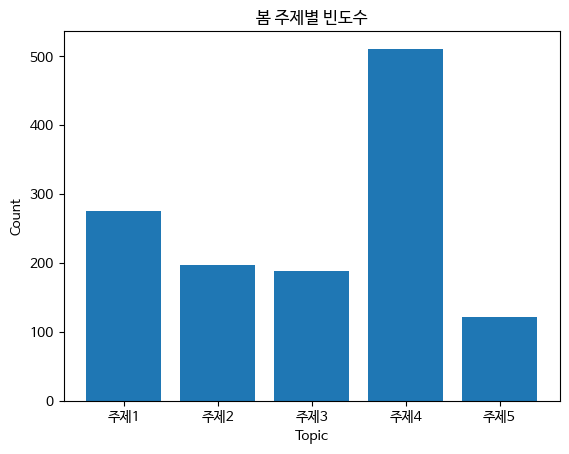

In [29]:
x = ["주제1","주제2","주제3","주제4","주제5"]
y = [spring_topic1,spring_topic2,spring_topic3,spring_topic4,spring_topic5]

plt.bar(x, y)
plt.xlabel('Topic')
plt.ylabel('Count')
plt.title('봄 주제별 빈도수')
plt.show()

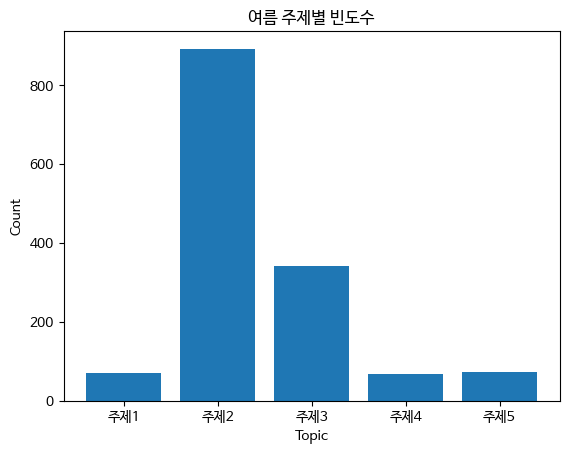

In [30]:
x = ["주제1","주제2","주제3","주제4","주제5"]
y = [summer_topic1,summer_topic2,summer_topic3,summer_topic4,summer_topic5]

plt.bar(x, y)
plt.xlabel('Topic')
plt.ylabel('Count')
plt.title('여름 주제별 빈도수')
plt.show()

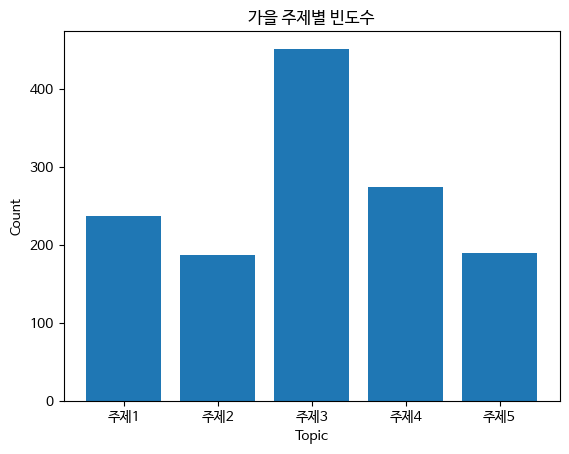

In [31]:
x = ["주제1","주제2","주제3","주제4","주제5"]
y = [autumn_topic1,autumn_topic2,autumn_topic3,autumn_topic4,autumn_topic5]

plt.bar(x, y)
plt.xlabel('Topic')
plt.ylabel('Count')
plt.title('가을 주제별 빈도수')
plt.show()

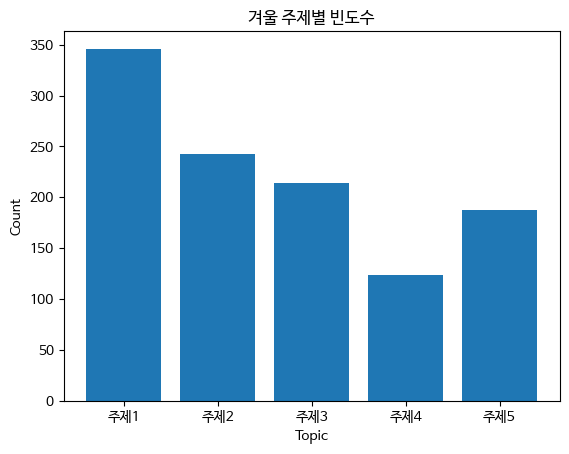

In [32]:
x = ["주제1","주제2","주제3","주제4","주제5"]
y = [winter_topic1,winter_topic2,winter_topic3,winter_topic4,winter_topic5]

plt.bar(x, y)
plt.xlabel('Topic')
plt.ylabel('Count')
plt.title('겨울 주제별 빈도수')
plt.show()